# Problema
### El objetivo es optimizar la organización de la cola de trenes en una estación ferroviaria de mercancías con tres tipos de operaciones: Carbón, Gas y Contenedores, y tres muelles especializados. Cada tren permanece en el muelle el tiempo equivalente al número de vagones que transporta. Se busca minimizar el tiempo de espera de los trenes en la cola utilizando algoritmos genéticos.










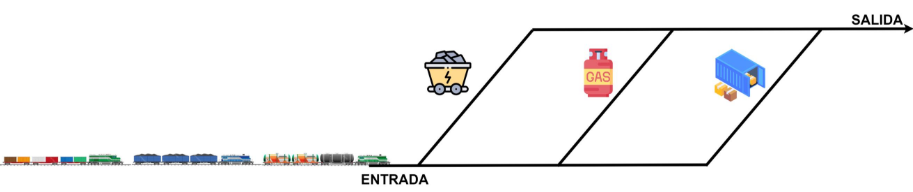

### Librerias

In [1]:
!pip install deap
import deap
import numpy as np
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


### La clase **Tren** se utiliza para representar objetos que contienen información sobre los vagones, la operación y la matrícula de un tren. La función __str__ permite imprimir de manera legible la información de un objeto Tren

In [2]:
class Tren:
  def __init__(self, vagones, operacion, matricula):
    self.vagones = vagones # Define un atributo llamado 'vagones' que almacena la cantidad de vagones del tren.
    self.operacion = operacion  # Define un atributo llamado 'operacion' que indica la operación asociada al tren (por ejemplo, carga o descarga).
    self.matricula = matricula  # Define un atributo llamado 'matricula' que representa la matrícula del tren.

  def __str__(self):
    return "Número de vagones: " + str(self.vagones) + "\n" + \
            "Operación: " + str(self.operacion) + "\n" + \
            "Matrícula: " + str(self.matricula)

### La función **producir_lista_trenes_aleatoria** genera una lista de objetos de tren con características aleatorias, como el número de vagones y el tipo de carga, y los devuelve como una lista

In [3]:
def producir_lista_trenes_aleatoria(n, min_vagones, max_vagones):
    lista_de_trenes = []
    for i in range(n):
        vagones = random.randint(min_vagones, max_vagones)  # Cada tren puede arrastrar entre 5 y 10 vagones
        carga = random.choice(["carbon", "gas", "contenedores"])  # A cada tren se le asigna un tipo de carga
        lista_de_trenes.append(Tren(vagones, carga, i)) #i es la matricula
    return lista_de_trenes

### Inicializa una lista de trenes con características aleatorias

In [4]:
random.seed(2024) #Semilla
n_trenes = 100 # Número de trenes
lista_de_trenes = producir_lista_trenes_aleatoria(n_trenes, 5, 10)

### La función **crear_cola_de_trenes**  crea una cola de trenes reorganizando aleatoriamente la lista de trenes original, simulando el orden en el que los trenes llegan a un punto de carga o descarga.

In [5]:
#Define la función para crear una cola de trenes
def crear_cola_de_trenes(lista_de_trenes):
  # Crea una copia de la lista de trenes para no modificar la original
  auxiliar = lista_de_trenes.copy()
  # Mezcla aleatoriamente los trenes en la lista auxiliar
  random.shuffle(auxiliar)
  return auxiliar


### La clase **Cola_de_trenes**, una lista especializada para trenes. El método __str__ convierte la cola en una cadena legible. Al crear un objeto Cola_de_trenes y imprimirlo, se muestra una representación legible de la cola de trenes.

In [6]:
class Cola_de_trenes(list):
    def __init__(self, lista_de_trenes):
        list.extend(self,crear_cola_de_trenes(lista_de_trenes))

    def __str__(self):
        cadena = ""
        for i in list(self):
            cadena += (str(i) + "\n")
        return cadena

cola_de_trenes = Cola_de_trenes(lista_de_trenes)

print(cola_de_trenes)

Número de vagones: 10
Operación: contenedores
Matrícula: 9
Número de vagones: 7
Operación: contenedores
Matrícula: 73
Número de vagones: 9
Operación: gas
Matrícula: 61
Número de vagones: 8
Operación: gas
Matrícula: 7
Número de vagones: 6
Operación: contenedores
Matrícula: 71
Número de vagones: 7
Operación: contenedores
Matrícula: 12
Número de vagones: 6
Operación: gas
Matrícula: 18
Número de vagones: 5
Operación: carbon
Matrícula: 78
Número de vagones: 6
Operación: gas
Matrícula: 72
Número de vagones: 6
Operación: gas
Matrícula: 70
Número de vagones: 10
Operación: gas
Matrícula: 94
Número de vagones: 7
Operación: carbon
Matrícula: 65
Número de vagones: 7
Operación: gas
Matrícula: 41
Número de vagones: 5
Operación: contenedores
Matrícula: 98
Número de vagones: 7
Operación: carbon
Matrícula: 96
Número de vagones: 9
Operación: contenedores
Matrícula: 99
Número de vagones: 9
Operación: gas
Matrícula: 33
Número de vagones: 5
Operación: contenedores
Matrícula: 91
Número de vagones: 9
Operaci

### La función **fitness** simula el proceso de carga/descarga de trenes en diferentes muelles de operaciones y calcula el tiempo total requerido para completar esta operación, lo que se utiliza como medida de aptitud para evaluar la calidad de un individuo en el algoritmo genético.

In [7]:
# Define la función de aptitud
def fitness(individuo, lista_de_trenes):
    tiempo_total = 0 # Inicializa el tiempo total acumulado
    contador_muelles = {"carbon": 0, "gas": 0, "contenedores": 0}

    # Itera sobre los índices de los trenes en el individuo
    for matricula in individuo:
        # Obtiene el tren correspondiente a la matricula de la lista de trenes
        tren = next((t for t in cola_de_trenes if t.matricula == matricula), None)
        # Verifica si el muelle de operaciones del tren está libre
        if contador_muelles[tren.operacion] == 0:
            # Si está libre, asigna el tiempo de carga/descarga del tren al muelle
            contador_muelles[tren.operacion] = tren.vagones * 5 #Le ponemos el 5 porque vamos a suponer que para cada vagan tarda 5 minutos
        else:

            #calcula el tiempo restante requerido por el tren anterior en el muelle
            tiempo_requisado = contador_muelles[tren.operacion]

            # Actualiza el tiempo restante en cada muelle después de la carga/descarga del tren anterior
            for operacion, tiempo_actual in contador_muelles.items():
                contador_muelles[operacion] = max(0, tiempo_actual - tiempo_requisado)

            # Asigna el tiempo de carga/descarga del tren al muelle actual
            contador_muelles[tren.operacion] = tren.vagones * 5

            # Suma el tiempo requerido por el tren anterior al tiempo total acumulado
            tiempo_total += tiempo_requisado

    # Suma el tiempo restante del último tren al tiempo total acumulado
    tiempo_total += max(contador_muelles.values())
    return tiempo_total,


In [8]:
# Creamos la clase FitnessMin que definirá un método de aptitud
# En weights tenemos una tupla porque capaz que además de minimizar también
# queremos maximizar o minimizar otra cosa
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Crea una clase llamada Individual que representa a un individuo de la población. Esta clase es una lista y tiene un atributo de aptitud de tipo FitnessMin.
creator.create("Individual", list, fitness=creator.FitnessMin)

# contenedor para registrar funciones y proporcionarlas al algoritmo
toolbox = base.Toolbox()

# Se registra la función indices y se utiliza para generar una permutación aleatoria de índices desde 0 hasta N_TRENES.
toolbox.register("indices", np.random.permutation, len(cola_de_trenes))

# registra una función llamada individual, utiliza tools.initIterate para inicializar un individuo utilizando la clase "Individual" creada anteriormente y los índices generados por la función "indices".
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

# Crea una población, utiliza tools.initRepeat como implementación (toma como argumentos el tipo de datos para representarla (lista) y otra función registrada llamada "individual" que se utiliza para inicializar cada individuo de la población.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Se registra la función evaluation usando la funcion anonima lambda que toma un individuo (lista de matriculas) como argumento y la lista de trenes por venir (para recupear los objetos de tipo Tren)
toolbox.register("evaluate", lambda ind: fitness(ind, cola_de_trenes))

# Durante la operación de cruce, se selecciona un segmento aleatorio de los elementos de uno de los padres y se copia en el hijo resultante, manteniendo el orden relativo de los elementos en ese segmento. Luego, se rellenan los elementos faltantes en el hijo con los elementos restantes del otro padre, en el orden en que aparecen.
toolbox.register("mate", tools.cxOrdered)

# Durante la operación de mutación, se seleccionan uno o más índices aleatorios en el individuo y se permutan los elementos en esos índices. Esto implica cambiar el orden de los elementos en la representación del individuo.
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

# Durante la operación de selección, se seleccionan varios individuos de la población de manera aleatoria y se los enfrenta en torneos. En cada torneo, se comparan los individuos y se elige el mejor de ellos para ser seleccionado como uno de los padres para la reproducción. El argumento tournsize=3 indica el tamaño del torneo, es decir, cuántos individuos se seleccionan para participar en cada torneo.
toolbox.register("select", tools.selTournament, tournsize=3)

In [9]:
# La población inicial de individuos.
pop = toolbox.population(n=50)
# Mantendrá un registro de los mejores individuos que se encuentren durante el proceso de evolución
ranking = tools.HallOfFame(1)

# Crea un objeto Statistics para realizar el seguimiento de las estadísticas de la población durante la evolución.  La función lambda se utiliza para seleccionar los valores de aptitud de los individuos.
stats = tools.Statistics(lambda ind: ind.fitness.values)
# Registra la función np.mean para calcular el promedio de los valores de aptitud de la población en cada generación.
stats.register("avg", np.mean)
# Registra la función np.min para calcular el valor mínimo de aptitud de la población en cada generación.
stats.register("min", np.min)
# Registra la función np.max para calcular el valor máximo de aptitud de la población en cada generación.
stats.register("max", np.max)

# Ejecuta el algoritmo genético eaSimple con los siguientes argumentos:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=500, stats=stats, halloffame=ranking, verbose=True)
#   pop: la población inicial de individuos.
#   toolbox: la caja de herramientas de DEAP que contiene las funciones necesarias para evaluar y manipular los individuos.
#   cxpb=0.5: la probabilidad de cruce entre dos individuos.
#   mutpb=0.2: la probabilidad de mutación de cada gen en un individuo.
#   ngen=100: el número de generaciones a evolucionar.
#   stats=stats: el objeto Statistics para realizar el seguimiento de las estadísticas de la población.
#   halloffame=ranking: el objeto HallOfFame para mantener un registro de los mejores individuos.
#   verbose=True: muestra información adicional durante la ejecución del algoritmo, como las estadísticas de la población en cada generación y los mejores individuos encontrados.

gen	nevals	avg   	min	max 
0  	50    	1160.1	953	1288
1  	24    	1115.9	953	1290
2  	29    	1083.48	953	1240
3  	24    	1062.9 	953	1245
4  	34    	1049.22	953	1188
5  	25    	1010.84	942	1249
6  	28    	993.1  	906	1260
7  	31    	967.9  	896	1111
8  	29    	967.44 	896	1199
9  	26    	966.06 	889	1087
10 	30    	959.8  	853	1106
11 	29    	958.74 	889	1180
12 	31    	952.82 	861	1224
13 	33    	933.2  	848	1199
14 	29    	926.6  	848	1181
15 	24    	920.22 	845	1058
16 	23    	915.28 	845	1046
17 	31    	921.92 	845	1099
18 	31    	899.96 	818	1124
19 	34    	909.16 	804	1127
20 	30    	909    	804	1117
21 	28    	891.56 	800	1164
22 	33    	884.24 	799	1152
23 	26    	872.38 	771	1045
24 	33    	865.88 	753	1134
25 	39    	841.28 	740	1098
26 	31    	834.6  	740	1060
27 	25    	823.42 	740	1088
28 	35    	826.92 	728	1117
29 	30    	840.92 	728	1103
30 	32    	858.66 	728	1166
31 	26    	828.72 	728	1163
32 	37    	800.74 	725	997 
33 	29    	811.44 	725	1055
34 	31    	796.82 	725	

In [10]:
print("Mejor individuo encontrado: ", ranking[0])
print("Tiempo total: ", ranking[0].fitness.values[0])

Mejor individuo encontrado:  [87, 77, 23, 20, 63, 4, 9, 50, 30, 6, 91, 76, 22, 15, 31, 51, 93, 13, 2, 90, 86, 28, 59, 5, 83, 78, 39, 66, 25, 1, 74, 16, 72, 7, 37, 97, 3, 56, 75, 60, 98, 17, 19, 88, 89, 80, 68, 26, 21, 96, 69, 42, 0, 18, 92, 85, 45, 34, 95, 99, 46, 24, 11, 36, 70, 67, 71, 10, 94, 33, 40, 8, 14, 43, 35, 38, 62, 47, 61, 12, 64, 57, 49, 82, 48, 79, 84, 54, 44, 58, 53, 41, 27, 81, 55, 65, 29, 73, 52, 32]
Tiempo total:  604.0


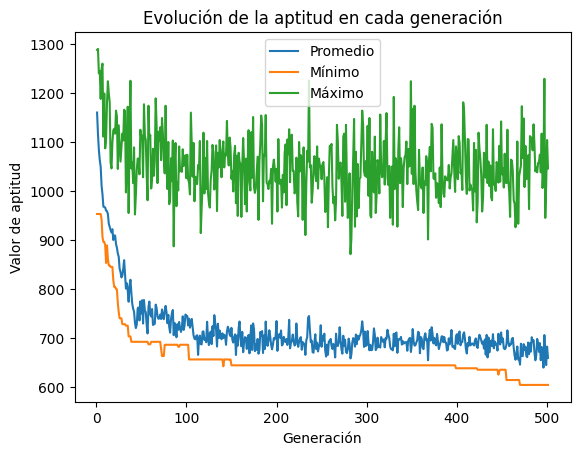

In [11]:

gen = range(1, len(log) + 1)
avg_fitness = log.select("avg")
min_fitness = log.select("min")
max_fitness = log.select("max")

plt.plot(gen, avg_fitness, label="Promedio")
plt.plot(gen, min_fitness, label="Mínimo")
plt.plot(gen, max_fitness, label="Máximo")

plt.xlabel("Generación")
plt.ylabel("Valor de aptitud")
plt.title("Evolución de la aptitud en cada generación")
plt.legend()

plt.show()
